In [1]:
#1
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP User\Desktop\nth\archive\imdb_top_1000.csv")

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
#2
drop_columns = ["Poster_Link", "Series_Title", "Released_Year", "Certificate", "Runtime", "Overview", "Meta_score", "Star1", "Star2", "Star3", "Star4", "No_of_Votes", "Gross"]
df = df.drop(columns = drop_columns)

In [6]:
df.head()

,Genre,IMDB_Rating,Director
0,Drama,9.3,Frank Darabont
1,"Crime, Drama",9.2,Francis Ford Coppola
2,"Action, Crime, Drama",9.0,Christopher Nolan
3,"Crime, Drama",9.0,Francis Ford Coppola
4,"Crime, Drama",9.0,Sidney Lumet


In [7]:
df.describe()

,IMDB_Rating
count,1000.000000
mean,7.949300
std,0.275491
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.300000


In [8]:
#no missing values.
nanCount = df.isna().sum()
print(nanCount)

Genre          0
IMDB_Rating    0
Director       0
dtype: int64


In [9]:
df.drop_duplicates()

,Genre,IMDB_Rating,Director
0,Drama,9.3,Frank Darabont
1,"Crime, Drama",9.2,Francis Ford Coppola
2,"Action, Crime, Drama",9.0,Christopher Nolan
3,"Crime, Drama",9.0,Francis Ford Coppola
4,"Crime, Drama",9.0,Sidney Lumet
...,...,...,...
995,"Comedy, Drama, Romance",7.6,Blake Edwards
996,"Drama, Western",7.6,George Stevens
997,"Drama, Romance, War",7.6,Fred Zinnemann
998,"Drama, War",7.6,Alfred Hitchcock


In [10]:
#3
mostRatingRow = df.loc[df['IMDB_Rating'].idxmax()]
print("The most popular genre of movies and TV shows is: ", mostRatingRow['Genre'])

The most popular genre of movies and TV shows is:  Drama


In [11]:
#4 as in the dataframe without splitting each genre.
genre = df["Genre"].value_counts().to_frame().reset_index()
genre.columns = ["Genre", "Count"]
genre

,Genre,Count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


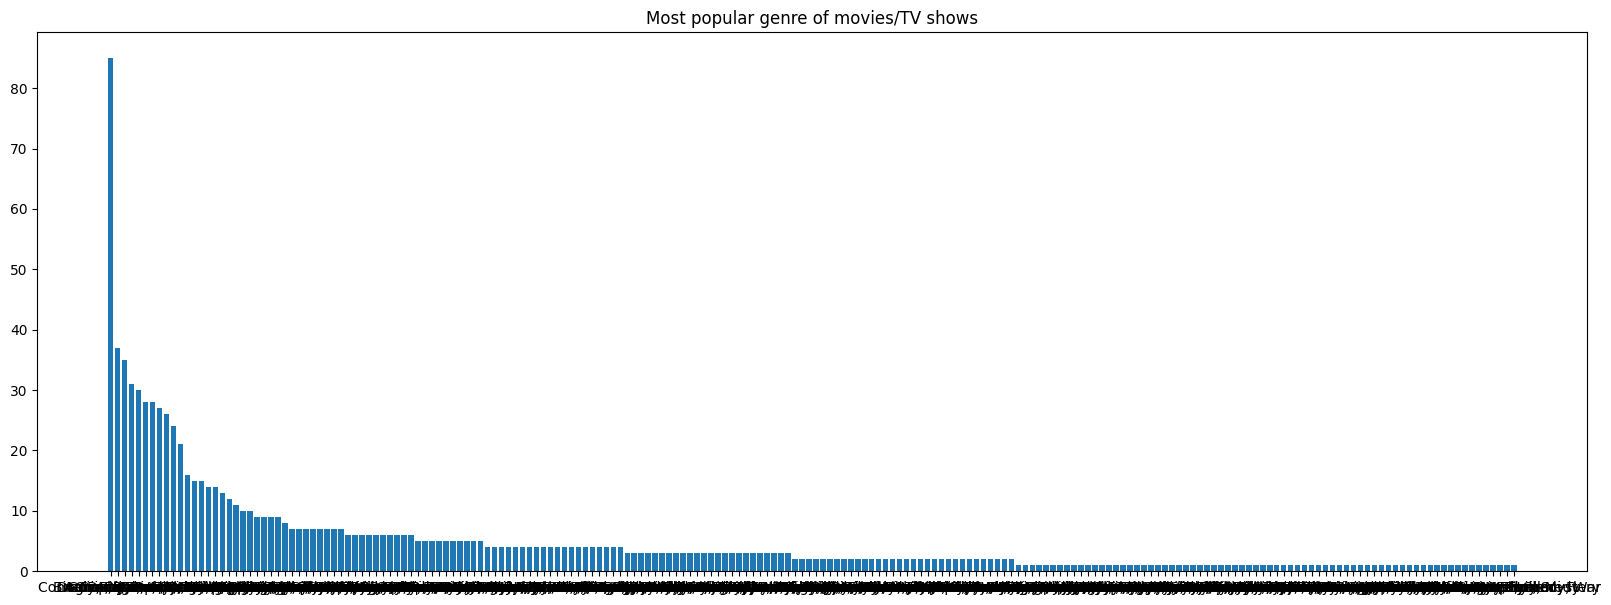

In [27]:
#5
from matplotlib import pyplot as plt
G = genre['Genre']
C = genre['Count']
fig = plt.figure(figsize =(20, 7))
plt.bar(G, C)
plt.title('Most popular genre of movies/TV shows')
plt.show()


In [13]:
#4 as in the dataframe but split each genre alone
genres = df.Genre.str.split(', ').explode()
genres
genreCountDf = genres.value_counts().reset_index()
genreCountDf.columns = ["Genre", "Count"]
genreCountDf

,Genre,Count
0,Drama,724
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


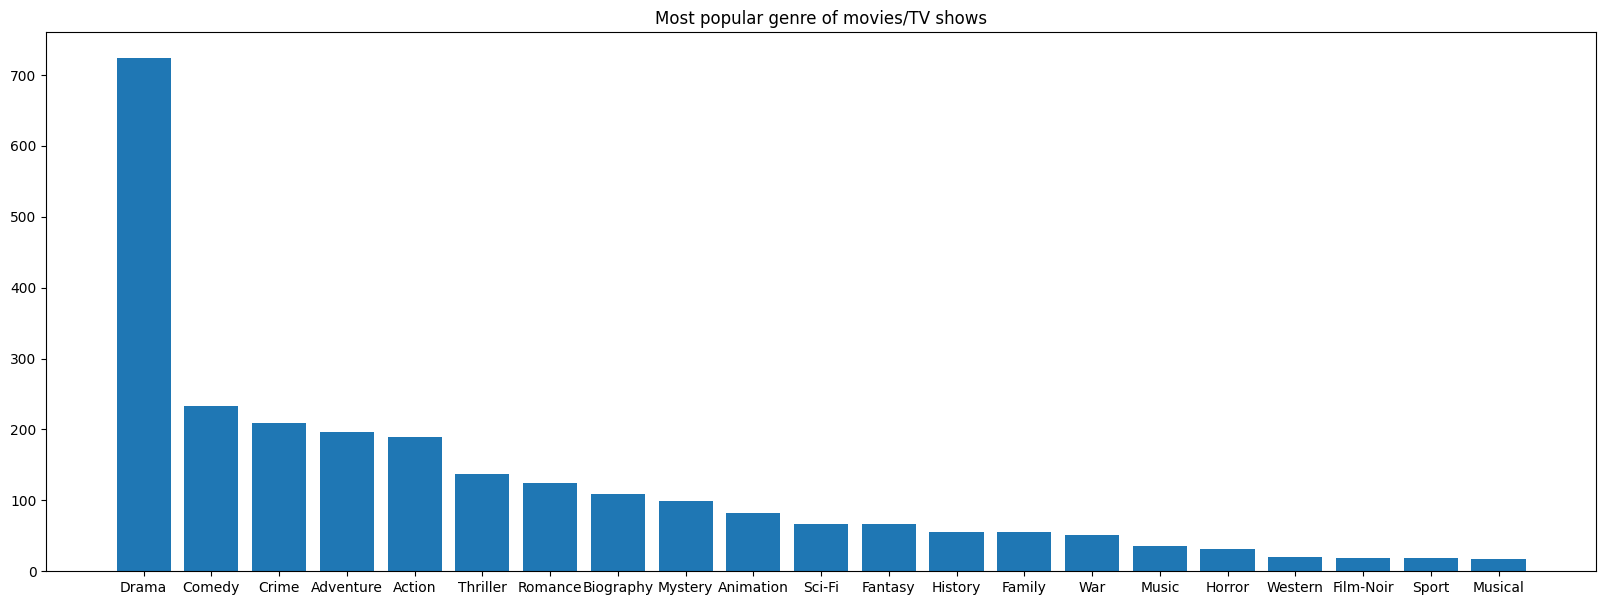

In [29]:
#5
from matplotlib import pyplot as plt
G = genreCountDf['Genre']
C = genreCountDf['Count']
fig = plt.figure(figsize =(20, 7))
plt.bar(G, C)
plt.title('Most popular genre of movies/TV shows')
plt.show()

In [15]:
#6 the director with highest rating(by taking the avg of all rates for each director) 
director_stats = df.groupby('Director').agg({'IMDB_Rating': ['count', 'mean']})
director_stats.columns = director_stats.columns.map('_'.join)
director_stats = director_stats.sort_values('IMDB_Rating_mean', ascending=False)
director_stats = director_stats.reset_index()
director_stats = director_stats.rename(columns={'Director': 'Director', 'IMDB_Rating_count': 'Count', 'IMDB_Rating_mean': 'Average_Rating'})
print("Director with the most top-rated movies/TV is: ", director_stats.iloc[0]['Director'])
director_stats = director_stats.drop('Average_Rating',  axis=1)
print(director_stats)

Director with the most top-rated movies/TV is:  Frank Darabont
            Director  Count
0     Frank Darabont      2
1     Irvin Kershner      1
2     Lana Wachowski      1
3       George Lucas      1
4    Roberto Benigni      1
..               ...    ...
543       Eric Bress      1
544        Ted Demme      1
545      Neil Burger      1
546   Bennett Miller      1
547      Mary Harron      1

[548 rows x 2 columns]


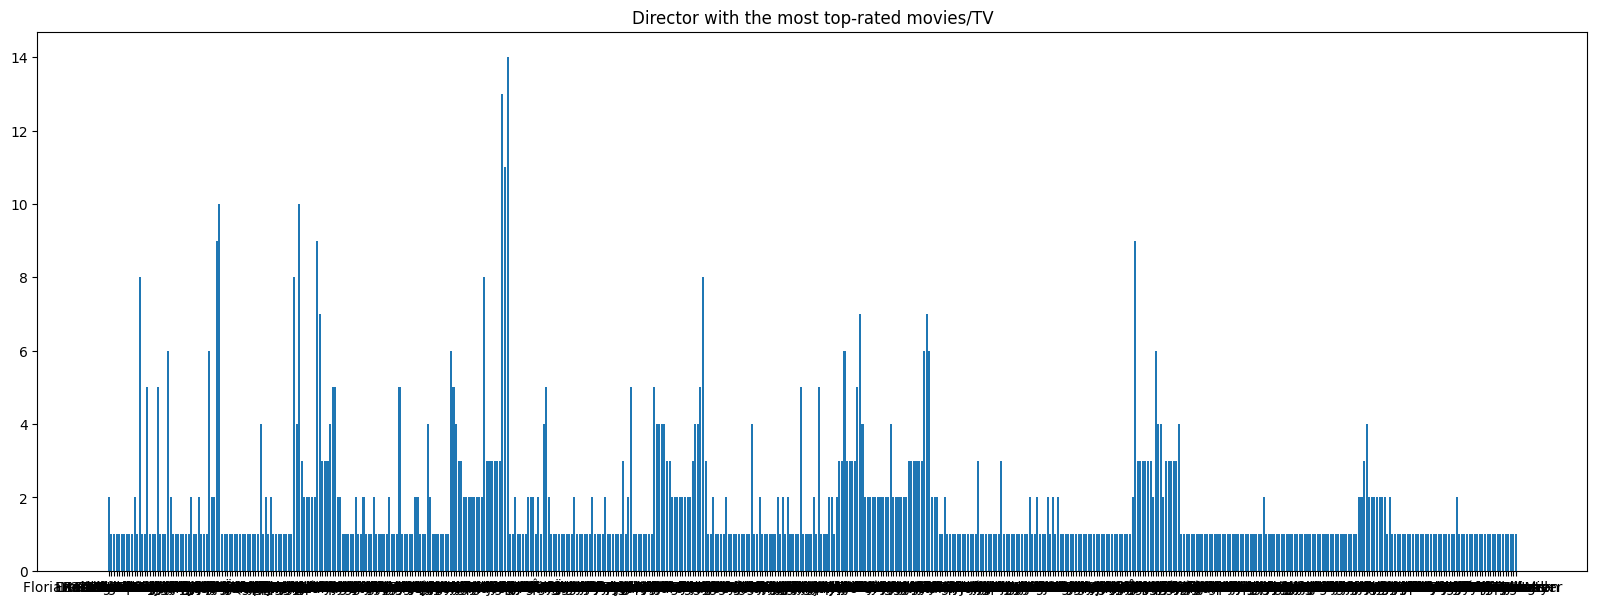

In [30]:
#7
from matplotlib import pyplot as plt
D = director_stats['Director']
C = director_stats['Count']
fig = plt.figure(figsize =(20, 7))
plt.bar(D, C)
plt.title('Director with the most top-rated movies/TV')
plt.show()


In [21]:
#6the director who has most number of movies in the dataset
director = df["Director"].value_counts().to_frame().reset_index()
director.columns = ["Director", "Count"]
director

,Director,Count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
...,...,...
543,Neill Blomkamp,1
544,Tomas Alfredson,1
545,Duncan Jones,1
546,Jacques Audiard,1


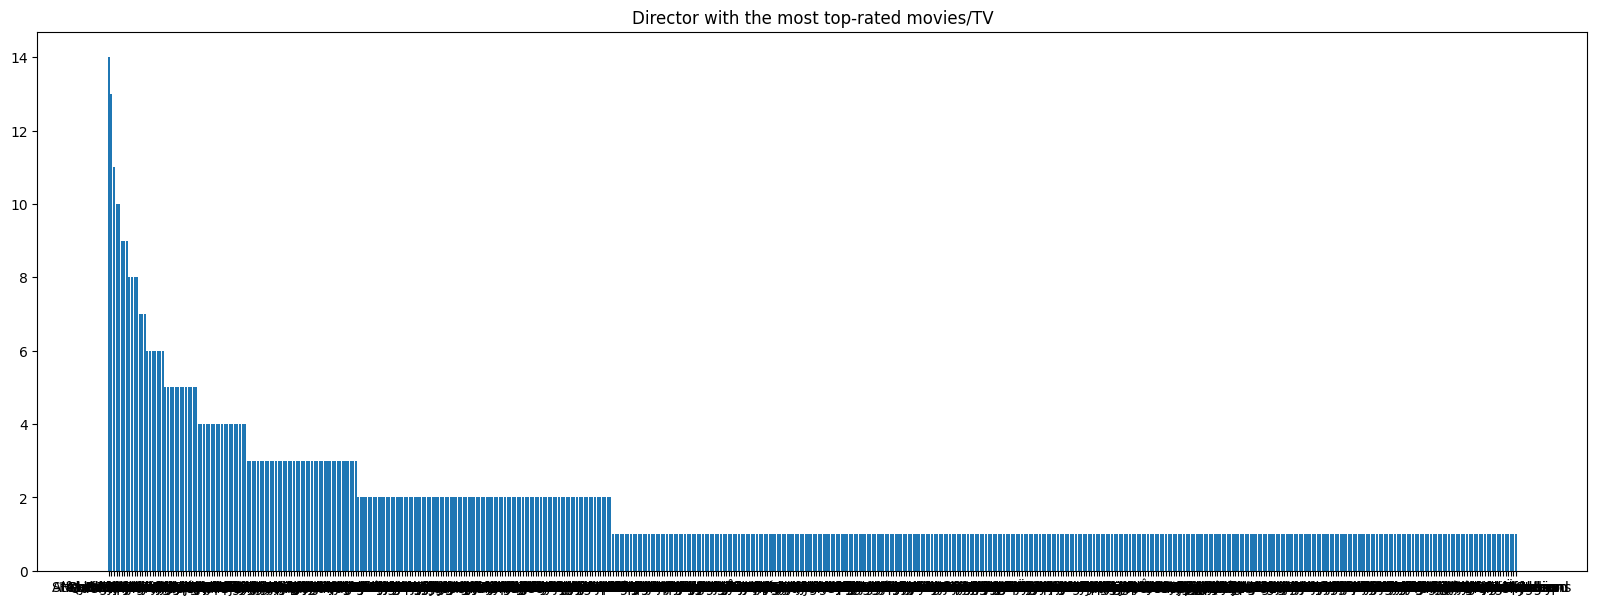

In [31]:
#7
from matplotlib import pyplot as plt
D = director['Director']
C = director['Count']
fig = plt.figure(figsize =(20, 7))
plt.bar(D, C)
plt.title('Director with the most top-rated movies/TV')
plt.show()

# Summary

I downloaded the dataset from Kaggle, load it into dataframe using read_csv() methos, and took a general look about it using .head() and .describe() methods, then stared to clean then the data by dropping the unnecessary columns which were (Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Overview, Meta_score, Star1, Star2, Star3, Star4, No_of_Votes, and Gross), the remaining columns were (Genre, IMDB_Rating, and Director), and after it checked the missing values using .isna() method, there were no missing values, last thing is to remove duplicated rows by .drop_duplicates() method, then found that the most popular genre of movies and TV shows was drama, and the director with highest rating(by taking the avg of all rates for each director) was Frank Darabont, and the director who has most number of movies in the dataset is Alfred Hitchcock.